<a href="https://colab.research.google.com/github/rida-manzoor/GenAI/blob/main/3_2_Chatbot_with_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 770.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/5

In [ ]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=135ed446103185866bae5411af92b1331fbc990ad3d48d4c4218909231ee6b87
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=f5bfe744cd5ea3c0de961a39750b153589f0887c0f96e11792bc25381bb62f59
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
# WOrking with external tools
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun


# Arxiv & Wikipedia tool
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(api_wrapper = arxiv_wrapper)

wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wikipedia_tool = WikipediaQueryRun(api_wrapper = wikipedia_wrapper)

In [ ]:
wikipedia_tool.invoke("what is probability?")

'Page: Bayesian probability\nSummary: Bayesian probability ( BAY-zee-ən or  BAY-zhən) is an interpretation of the concept of probability, in which, instead of frequency or propensity of some phenomenon, probability is interpreted as reasonable expectation representing a state of knowledge or as quanti'

In [ ]:
arxiv_tool.invoke("what is probability?")

'Published: 2012-12-13\nTitle: Spin dynamics in tunneling decay of a metastable state\nAuthors: Yue Ban, E. Ya. Sherman\nSummary: We analyze spin dynamics in the tunneling decay of a metastable localized\nstate in the presence of spin-orbit coupling. We find that the spin\npolarization at short time scale'

In [ ]:
tools = [wikipedia_tool]

In [ ]:
# LangGraph App

from langgraph.graph.message import add_messages

class State(TypedDict):
  messages:Annotated[list,add_messages]

In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
graph_builder = StateGraph(State)

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
print(groq_api_key)

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


In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name='Gemma2-9b-It')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f4ca41bdb40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f4ca41bceb0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm.invoke("what is probability?")

AIMessage(content="Probability is a measure of how likely an event is to occur. \n\nHere's a simple breakdown:\n\n* **Event:**  Something that can happen.  \n    * Examples: Flipping a coin and getting heads, rolling a die and getting a 6, raining tomorrow.\n* **Probability:** A number between 0 and 1 (or 0% and 100%) that expresses the chance of the event happening.\n    *  0 means the event is impossible.\n    *  1 means the event is certain.\n    *  Values in between represent varying degrees of likelihood.\n\n**Think of it like this:**\n\nIf you flip a fair coin, there are two equally likely outcomes: heads or tails.  So, the probability of getting heads is 1/2 or 50%.\n\n**Key Concepts:**\n\n* **Randomness:** Probability deals with events that have uncertain outcomes.\n* **Experiments:** We often use experiments (like flipping a coin) to observe probabilities in action.\n* **Sample Space:**  The set of all possible outcomes of an experiment (e.g., {heads, tails} for a coin flip).\

In [ ]:
llm_with_tool = llm.bind_tools(tools=tools)

In [ ]:
def chatbot(state:State):
  return {"messages":[llm_with_tool.invoke(state["messages"])]}

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

In [ ]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph = graph_builder.compile()

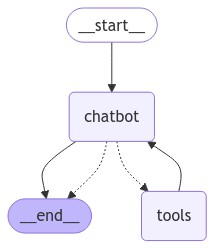

In [ ]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [ ]:
user_input = "Hi, Whats up"

events = graph.stream(
    {"messages": [("user", user_input)]}, stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, Whats up
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_mjhj)
 Call ID: call_mjhj
  Args:
    query: whats up


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_1jn6)
 Call ID: call_1jn6
  Args:
    query: whats up meaning
================================= Tool Message =================================
Name: wikipedia

Page: Meaning of life
Summary: The meaning of life pertains to the inherent significance or philosophical meaning of living (or existence in general). There is not a definitive answer, and thinking or discourse on the topic is sought in the English language through the question, "What is the meaning
================================== Ai Message ==================================

"What's up" is a casual greeting. It can mean "Hello" or "What's happening?".
